# Key Observation

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
[[41, 49, 39, 43, 59, 62, 49, 50], [41, 42, 40, 42, 67, 67, 58, 59], [58, 64, 37, 39, 73, 77, 62, 64], [75, 90, 67, 86, 82, 83, 69, 71]]


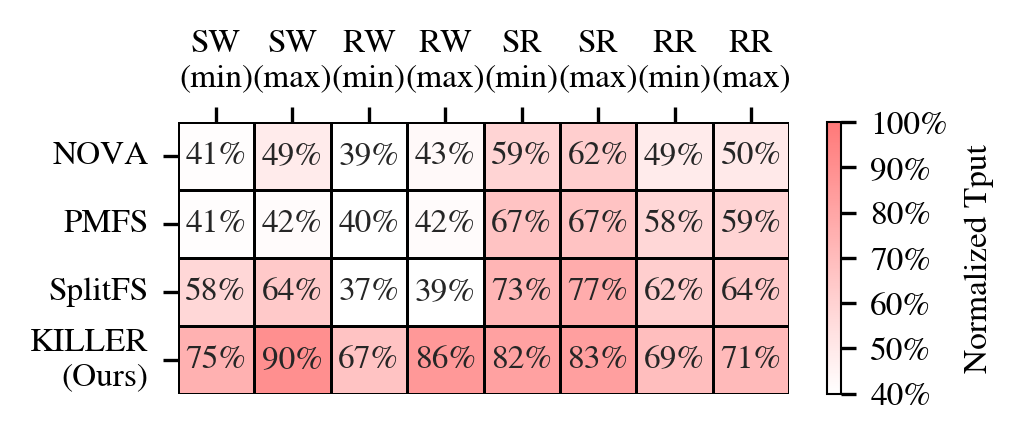

In [142]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54

print(style.available)
# matplotlib style settings
# matplotlib.rcParams['text.usetex'] = False
style.use('default')
# plt.rcParams["axes.grid"] = True
# plt.rcParams["axes.grid.axis"] = "y"
# plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
matplotlib.rcParams.update()



# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table-small-orig", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

df.drop(df[df['file_system'] == "PMM"].index, inplace=True)

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4)))
patterns = ['///', '\\\\\\', '', 'XXX', 'OOO', '---', '+++']
# Reference: https://designbro.com/blog/inspiration/color-combinations/
colors = ["#2b2d42", "#8d99ae", "#edf2f4", "#ef233c", "#ef233c", "#ef233c", "#ef233c", "#ef233c",]

bw_matrix = []
# fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
ops = ["seq-write", "rnd-write", "seq-read", "rnd-read"]

fss = ["NOVA", "PMFS", "SplitFS-FIO", "KILLER"]
for idx, fs in enumerate(fss):
    bws = []
    for op in ops:
        value = 2230 if op == "seq-write" or op == "rnd-write" else 2440
        bws.append(round(df[(df['file_system'] == fs) & (df['ops'] == op)]['bandwidth(MiB/s)'].min() * 100/value))
        bws.append(round(df[(df['file_system'] == fs) & (df['ops'] == op)]['bandwidth(MiB/s)'].max() * 100/value))
    bw_matrix.append(bws)

print(bw_matrix)
ticks = [40, 50, 60, 70, 80, 90, 100]
ticklabels = ["40%", "50%", "60%", "70%", "80%", "90%", "100%"]


colormap = LinearSegmentedColormap.from_list("", ["white", "#FF7979"])

ax = sns.heatmap(data=bw_matrix, vmin=40, vmax=100, annot=True, linewidths=0.25, annot_kws={"size": 8}, cmap=colormap, linecolor="black")
# add boarder for ax
cbar = ax.collections[0].colorbar
cbar.set_ticks(ticks)
cbar.set_ticklabels(ticklabels, fontsize=8)
cbar.outline.set_color('black')
cbar.outline.set_linewidth(0.5)
cbar.set_label("Normalized Tput", fontsize=8)
# cbar.ax.tick_params(height=0.5)
# , cbar_kws={'ticks': ticks, 'label': "Normalized Tput", 'format': '%.0f%%'}
ax.tick_params(right=False)

for t in ax.texts: t.set_text(t.get_text() + "%")
ax.set_yticklabels(["NOVA", "PMFS", "SplitFS", "KILLER\n(Ours)"], rotation=360, ha="right", va="center", fontsize=8)
ax.xaxis.tick_top()

# ax.set_xticklabels(["SW\n(min)", "SW\n(max)", "RW\n(min)", "RW\n(max)", "SR\n(min)", "SR\n(max)"], fontsize=8)
ax.set_xticklabels(["SW\n(min)", "SW\n(max)", "RW\n(min)", "RW\n(max)", "SR\n(min)", "SR\n(max)", "RR\n(min)", "RR\n(max)"], fontsize=8)
# ax.set_ylabel("File systems", fontsize=8)

# plot an hline
# plt.axhline(y=3, color='red', linewidth=0.5, linestyle='--')

plt.tight_layout()
plt.savefig("./FIG-Motivation.pdf", bbox_inches='tight', pad_inches=0)
# ax.tick_params(which='major',direction='out',width=4)
# tick_params(which='major',width=4)


# BAR Plot

/tmp/ipykernel_36930/991187157.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-white')


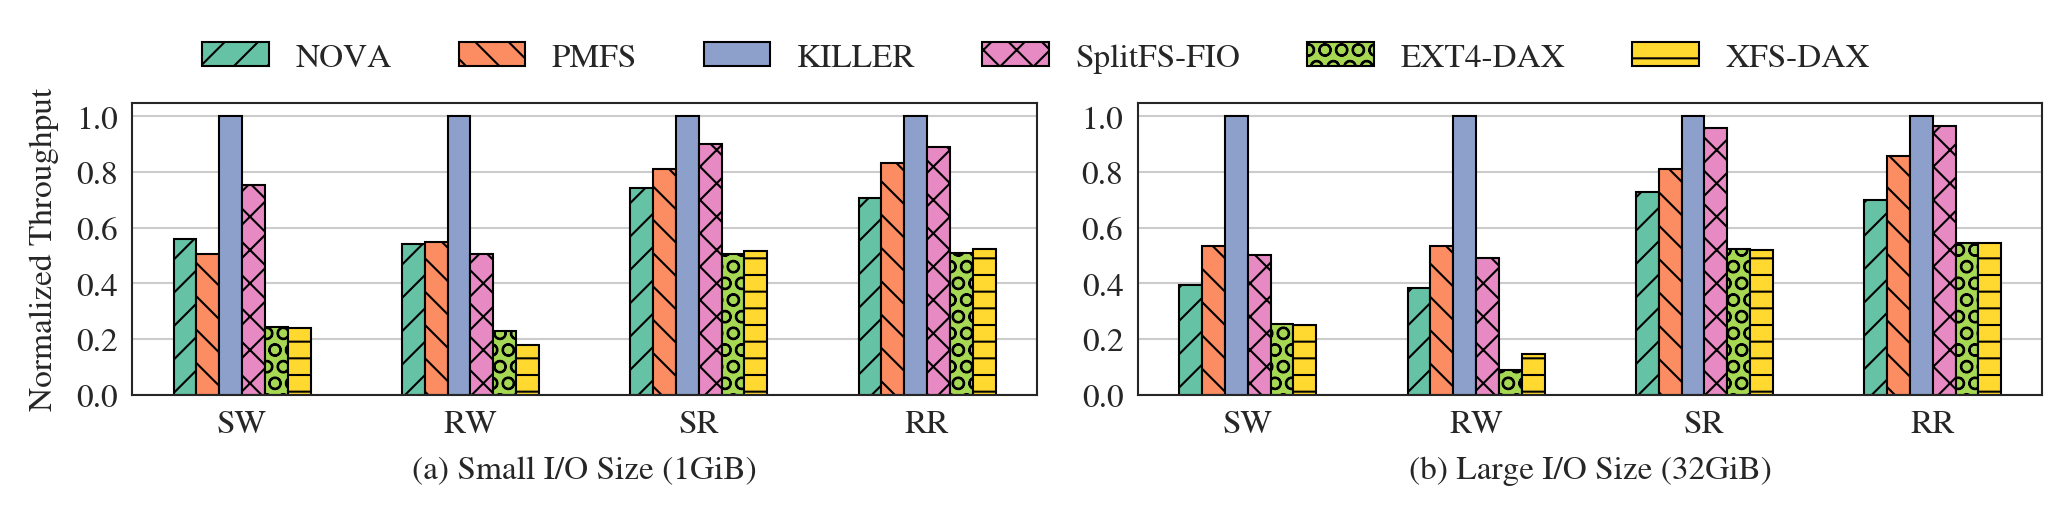

In [44]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import matplotlib.gridspec as gridspec


# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table-large", "r") as f:
    df_io_large = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
with open("./performance-comparison-table-small", "r") as f:
    df_io_small = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

df_io_large.drop(df_io_large[df_io_large['file_system'] == "PMM"].index, inplace=True)
df_io_small.drop(df_io_small[df_io_small['file_system'] == "PMM"].index, inplace=True)

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(DOUBLE_COL_WIDTH), cm_to_inch(4)))
bar_width = 0.1
subfig_titles = ["(a) Small I/O Size (1GiB)", "(b) Large I/O Size (32GiB)"]
patterns = ['///', '\\\\\\', '', 'XXX', 'OOO', '---', '+++']
# Reference: https://designbro.com/blog/inspiration/color-combinations/
colors = ["#2b2d42", "#8d99ae", "#edf2f4", "#ef233c", "#ef233c", "#ef233c", "#ef233c", "#ef233c",]

dfs = [df_io_small, df_io_large]

for df_idx, df in enumerate(dfs):
    plt.subplot(1, 2, df_idx + 1)
    fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
    ops = ["seq-write", "rnd-write", "seq-read", "rnd-read"]
    tot = len(fss) * bar_width
    x = list(range(1, len(ops) + 1))

    for op in ops:
        value = df[df['ops'] == op]['bandwidth(MiB/s)'] / df[df['ops'] == op]['bandwidth(MiB/s)'].max()
        df.loc[df['ops'] == op, 'bandwidth(MiB/s)'] = value
    
    for idx, fs in enumerate(fss):
        points = []
        for pivot in x:
            point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
            points.append(point)
        bws = []
        for op in ops:
            bws.append(df[(df['file_system'] == fs) & (df['ops'] == op)]['bandwidth(MiB/s)'].iloc[0])
        if fs == "PMM":
            plt.axhline(1, color=colors[idx], linestyle='--', linewidth=1)
        else:
            plt.bar(points, bws, width=bar_width, hatch=patterns[idx], edgecolor='black', color=plt.get_cmap('Set2')(idx), linewidth=0.5)
    
    # Draw title
    plt.xticks(x, labels=["SW", "RW", "SR", "RR"], fontsize=8)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=8)
    plt.xlabel(subfig_titles[df_idx], fontsize=8) 
    if (df_idx == 0):
        plt.ylabel('Normalized Throughput', fontsize=8)

    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
        
# legend_labels = ["PMM"]
legend_labels = fss
# legend_labels.extend(fss[:-1]) 
fig.legend(legend_labels, loc='center', bbox_to_anchor=(0.5, 1), ncol=6, fontsize=8, frameon=False)
plt.tight_layout()
plt.savefig("./FIG-IO.pdf", bbox_inches='tight', pad_inches=0)


# Single Column Bar Plot

/tmp/ipykernel_36930/2761028026.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-white')


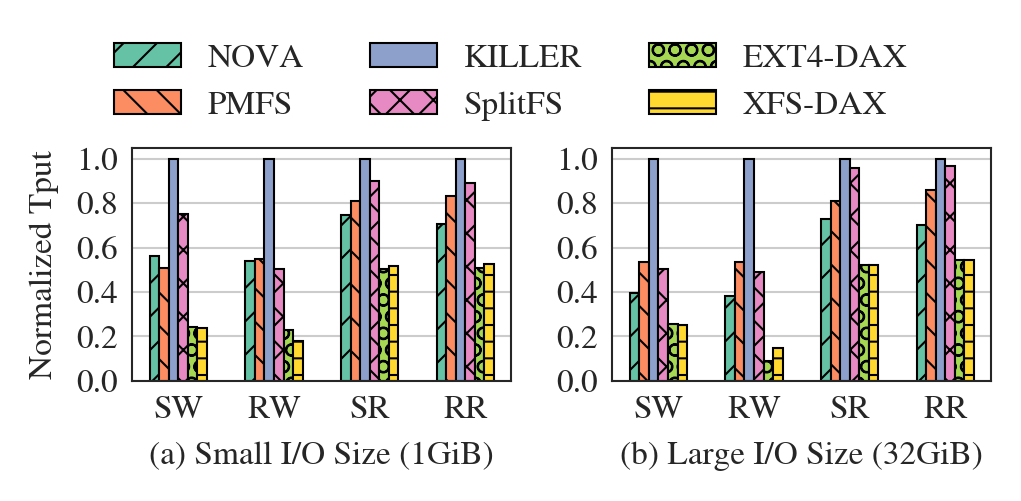

In [45]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import matplotlib.gridspec as gridspec


# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table-large", "r") as f:
    df_io_large = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
with open("./performance-comparison-table-small", "r") as f:
    df_io_small = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

df_io_large.drop(df_io_large[df_io_large['file_system'] == "PMM"].index, inplace=True)
df_io_small.drop(df_io_small[df_io_small['file_system'] == "PMM"].index, inplace=True)

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(3.5)))
bar_width = 0.1
subfig_titles = ["(a) Small I/O Size (1GiB)", "(b) Large I/O Size (32GiB)"]
patterns = ['///', '\\\\\\', '', 'XXX', 'OOO', '---', '+++']
# Reference: https://designbro.com/blog/inspiration/color-combinations/
colors = ["#2b2d42", "#8d99ae", "#edf2f4", "#ef233c", "#ef233c", "#ef233c", "#ef233c", "#ef233c",]

dfs = [df_io_small, df_io_large]

for df_idx, df in enumerate(dfs):
    plt.subplot(1, 2, df_idx + 1)
    fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
    ops = ["seq-write", "rnd-write", "seq-read", "rnd-read"]
    tot = len(fss) * bar_width
    x = list(range(1, len(ops) + 1))

    for op in ops:
        value = df[df['ops'] == op]['bandwidth(MiB/s)'] / df[df['ops'] == op]['bandwidth(MiB/s)'].max()
        df.loc[df['ops'] == op, 'bandwidth(MiB/s)'] = value
    
    for idx, fs in enumerate(fss):
        points = []
        for pivot in x:
            point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
            points.append(point)
        bws = []
        for op in ops:
            bws.append(df[(df['file_system'] == fs) & (df['ops'] == op)]['bandwidth(MiB/s)'].iloc[0])
        if fs == "PMM":
            plt.axhline(1, color=colors[idx], linestyle='--', linewidth=1)
        else:
            plt.bar(points, bws, width=bar_width, hatch=patterns[idx], edgecolor='black', color=plt.get_cmap('Set2')(idx), linewidth=0.5)
    
    # Draw title
    plt.xticks(x, labels=["SW", "RW", "SR", "RR"], fontsize=8)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=8)
    plt.xlabel(subfig_titles[df_idx], fontsize=8) 
    if (df_idx == 0):
        plt.ylabel('Normalized Tput', fontsize=8)

    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
        
# legend_labels = ["PMM"]
legend_labels = fss
# legend_labels.extend(fss[:-1]) 
legend_labels = legend_labels.replace("SplitFS-FIO", "SplitFS")
fig.legend(legend_labels, loc='center', bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize=8, frameon=False)
plt.tight_layout()
plt.savefig("./FIG-IO.pdf", bbox_inches='tight', pad_inches=0)


# Analyze KILLER for BOX Plot

In [46]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MultipleLocator
from brokenaxes import brokenaxes

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table-large-orig", "r") as f:
    df_io_large = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
with open("./performance-comparison-table-small-orig", "r") as f:
    df_io_small = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

df_io_large.drop(df_io_large[df_io_large['file_system'] == "PMM"].index, inplace=True)
df_io_small.drop(df_io_small[df_io_small['file_system'] == "PMM"].index, inplace=True)

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4)))
bar_width = 0.2
subfig_titles = ["(a) Small I/O Size (1GiB)", "(b) Large I/O Size (32GiB)"]
patterns = ['///', '\\\\\\', '', 'XXX', 'OOO', '---', '+++']
# Reference: https://designbro.com/blog/inspiration/color-combinations/
colors = ["#2b2d42", "#8d99ae", "#edf2f4", "#ef233c", "#ef233c", "#ef233c", "#ef233c", "#ef233c",]

# dfs = [df_io_small, df_io_large]
dfs = [df_io_small, df_io_large]
boxplots = []
# gs0 = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[1, 1],  wspace=0.1)
for df_idx, df in enumerate(dfs):
    # gs0_fid = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs0[df_idx], hspace=0.2, height_ratios=[7, 2])
    # ax_top = plt.subplot(gs0_fid[0])
    # ax_bottom = plt.subplot(gs0_fid[1])
    plt.subplot(1, 2, df_idx + 1)
    ax = fig.gca()
    lw = 0.5
    # for axis in ['top','bottom','left','right']:
    #     ax.spines[axis].set_linewidth(lw)
    # ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    # ax.grid(which='minor', linewidth='0.5')
    # fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
    fss = ["NOVA", "PMFS", "KILLER", "SplitFS-FIO"]
    ops = ["seq-write", "rnd-write", "seq-read", "rnd-read"]
    tot = len(fss) * bar_width
    x = list(range(1, len(ops) + 1))
    
    for idx, fs in enumerate(fss):
        points = []
        for pivot in x:
            point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
            points.append(point)
        bws = []
        for op in ops:
            bws.append(df[(df['file_system'] == fs) & (df['ops'] == op)]['bandwidth(MiB/s)'])
        # if fs == "PMM":
        #     plt.axhline(1, color=colors[idx], linestyle='--', linewidth=1)
        # else:
        #     plt.bar(points, bws, width=bar_width, hatch=patterns[idx], edgecolor='black', color=plt.get_cmap('Set2')(idx), linewidth=0.5)
        # Boxplot
        bp = ax.boxplot(bws, positions=points, widths=bar_width, patch_artist=True, showmeans=True, boxprops=dict(facecolor=plt.get_cmap('Set2')(idx), color='black', linewidth=0.5), whiskerprops=dict(color='black', linewidth=0.5), capprops=dict(color='black', linewidth=0.5), medianprops=dict(color='black', linewidth=0.5), meanprops=dict(marker='.', markeredgecolor='black', markerfacecolor='white', markersize=0.5, linewidth=0.5), flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 0.5})
        
        # bp = ax_bottom.boxplot(bws, positions=points, widths=bar_width, patch_artist=True, showmeans=True, boxprops=dict(facecolor=plt.get_cmap('Set2')(idx), color='black', linewidth=0.5), whiskerprops=dict(color='black', linewidth=0.5), capprops=dict(color='black', linewidth=0.5), medianprops=dict(color='black', linewidth=0.5), meanprops=dict(marker='.', markeredgecolor='black', markerfacecolor='white', markersize=0.5, linewidth=0.5), flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 0.5})
        
        boxplots.append(bp)

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
        ax.spines[axis].set_linewidth(lw)
    
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.grid(which='minor', linewidth='0.5', color = 'red', zorder=999, linestyle="--")
    
    ax.set_ylim(500, 2100)
    ax.set_yticks([500, 900, 1300, 1700, 2100])
    ax.set_yticklabels([0.5, 0.9, 1.3, 1.7, 2.1], fontsize=8)
    # if df_idx == 0:
    #     ax_bottom.set_ylim(400, 1000)
    #     ax_bottom.set_yticks([400, 1000])
    #     ax_bottom.set_yticklabels([0.4, 1], fontsize=8)
    # else:
    #     ax_bottom.set_ylim(400, 1000)
    #     ax_bottom.set_yticks([400, 1000])
    #     ax_bottom.set_yticklabels([0.4, 1], fontsize=8)
        
    # ax.spines['bottom'].set_visible(False)
    # ax_bottom.spines['top'].set_visible(False)
    # Draw title
    # bax.xticks(x, labels=["SW", "RW", "SR", "RR"], fontsize=8)
    # bax.ylim(1400, 2100)
    # bax.yticks([1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100], labels=[1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1], fontsize=8)
    # bax.xlabel(subfig_titles[df_idx], fontsize=8) 
    # if (df_idx == 0):
    #     plt.ylabel('Throughput (GiB/s)', fontsize=8)
        
    # ax_bottom.set_xlabel(["SW", "RW", "SR", "RR"], fontsize=8)
    ax.set_xticks(x)
    ax.set_xticklabels(["SW", "RW", "SR", "RR"], fontsize=8)
    
    # ax_top.set_xticks(x)
    # ax_top.set_xticklabels([])

    # 斜度还要看两拼接子图大小是几比几
    # d = .015 
    # kwargs = dict(transform=ax_top.transAxes, color='k', clip_on=False, linewidth=0.5)
    # ax_top.plot((-d, +d), (-d, +d), **kwargs)        
    # ax_top.plot((1 - d, 1 + d), (-d, + d), **kwargs)  
    
    # kwargs.update(transform=ax_bottom.transAxes)
    # ax_bottom.plot((-d, +d), (1 - d * 7/2, 1 + d* 7/2), **kwargs)  
    # ax_bottom.plot((1 - d, 1 + d), (1 - d* 7/2, 1 + d* 7/2), **kwargs)  

    ax.set_xlabel(subfig_titles[df_idx], fontsize=8)
    
# fig.supylabel("Throughput (GiB/s)").set_position((0.03, 0.5))
# legend_labels = ["PMM"]
fig.text(0, 0.55, "Throughput (GiB/s)", va='center', rotation='vertical', fontsize=8)
legend_labels = fss
# legend_labels.extend(fss[:-1]) 
plt.tight_layout()
# fig.legend(, loc='center', bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize=8, frameon=False)
bps = [ bp["boxes"][0] for bp in boxplots[:len(fss)] ]
fig.legend(bps, legend_labels, loc='center', bbox_to_anchor=(0.5, 1), ncol=4, fontsize=8, frameon=False, columnspacing=0.8)
# plt.tight_layout()
plt.savefig("./FIG-IO-Analysis.pdf", bbox_inches='tight', pad_inches=0)


ModuleNotFoundError: No module named 'brokenaxes'

# Draw FS together

KILLER 1610 2020
NOVA 660 1100
PMFS 920 940
SplitFS-FIO 870 1430
KILLER 1490 1920
NOVA 600 970
PMFS 860 950
SplitFS-FIO 800 880
KILLER 1990 2030
NOVA 1450 1530
PMFS 1630 1650
SplitFS-FIO 1780 1950
KILLER 1620 1740
NOVA 1130 1220
PMFS 1410 1440
SplitFS-FIO 1510 1600


/home/deadpool/.local/lib/python3.6/site-packages/ipykernel_launcher.py:124: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


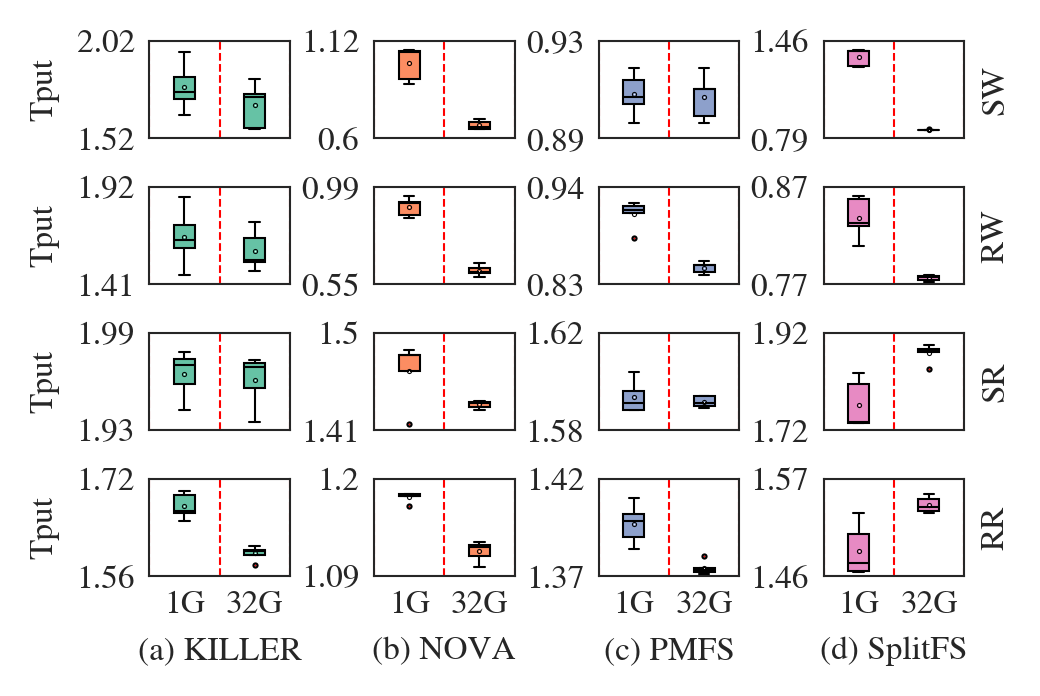

In [ ]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FormatStrFormatter, MultipleLocator
from brokenaxes import brokenaxes
import math

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table-large-orig", "r") as f:
    df_io_large = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
with open("./performance-comparison-table-small-orig", "r") as f:
    df_io_small = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

df_io_large.drop(df_io_large[df_io_large['file_system'] == "PMM"].index, inplace=True)
df_io_small.drop(df_io_small[df_io_small['file_system'] == "PMM"].index, inplace=True)

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(6)))
bar_width = 0.3
subfig_titles = ["(a) Small I/O Size (1GiB)", "(b) Large I/O Size (32GiB)"]
patterns = ['///', '\\\\\\', '', 'XXX', 'OOO', '---', '+++']
# Reference: https://designbro.com/blog/inspiration/color-combinations/
colors = ["#2b2d42", "#8d99ae", "#edf2f4", "#ef233c", "#ef233c", "#ef233c", "#ef233c", "#ef233c",]

# dfs = [df_io_small, df_io_large]
dfs = [df_io_small, df_io_large]
boxplots = []
gs0 = gridspec.GridSpec(4, 4, figure=fig, wspace=0.6, hspace=0.5)
fss = ["KILLER", "NOVA", "PMFS", "SplitFS-FIO"]
fss_title = ["(a) KILLER", "(b) NOVA", "(c) PMFS", "(d) SplitFS"]
ops = ["seq-write", "rnd-write", "seq-read", "rnd-read"]
ops_remap = ["SW", "RW", "SR", "RR"]

for workload_idx, workload in enumerate(ops):
    for fs_idx, fs in enumerate(fss):
        pic_id = workload_idx * len(fss) + fs_idx
        ax = plt.subplot(gs0[pic_id])

        tot = len(fss) * bar_width
        x = list(range(1, len(dfs) + 1))
        
        bws = []
        for df_idx, df in enumerate(dfs):
            bws.append(df[(df['file_system'] == fs) & (df['ops'] == workload)]['bandwidth(MiB/s)'])
        # for idx, fs in enumerate(fss):
        #     points = []
        #     for pivot in x:
        #         point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
        #         points.append(point)
        #     for op in ops:

        
        # Boxplot
        bp = ax.boxplot(bws, positions=x, widths=bar_width, patch_artist=True, showmeans=True, boxprops=dict(facecolor=plt.get_cmap('Set2')(fs_idx), color='black', linewidth=0.5), whiskerprops=dict(color='black', linewidth=0.5), capprops=dict(color='black', linewidth=0.5), medianprops=dict(color='black', linewidth=0.5), meanprops=dict(marker='.', markeredgecolor='black', markerfacecolor='white', markersize=0.5, linewidth=0.5), flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 0.5})
        
        boxplots.append(bp)

        lw = 0.5
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(lw)
            ax.spines[axis].set_linewidth(lw)
        
        ax.xaxis.set_minor_locator(MultipleLocator(0.5))
        ax.grid(which='minor', linewidth='0.5', color = 'red', zorder=999, linestyle="--")
        # drop index
        bws = [bw.values for bw in bws]
        min_ylim = math.ceil(min(min(bws[0]), min(bws[1])) / 10) * 10
        max_ylim = math.ceil(max(max(bws[0]), max(bws[1])) / 10) * 10
        print(fs, min_ylim, max_ylim)
        gap = math.ceil(0.1 * (max_ylim - min_ylim) / 10) * 10
        ax.set_ylim(min_ylim - gap, max_ylim + gap)
        ax.set_yticks([min_ylim - gap, max_ylim + gap])
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax.set_yticklabels([round((min_ylim - gap) / 1024, 2), round((max_ylim + gap) / 1024, 2)], fontsize=8)
        # make y label %.2f
        ax.set_xticks(x)
        ax.set_xticklabels([])

        if fs == "KILLER":
            ax.set_ylabel("Tput", fontsize=8)
        if fss.index(fs) == 3:
            ax.set_ylabel(ops_remap[workload_idx], fontsize=8)
            ax.yaxis.set_label_position("right")
        # ax.set_ylim(500, 2100)
        # ax.set_yticks([500, 900, 1300, 1700, 2100])
        # ax.set_yticklabels([0.5, 0.9, 1.3, 1.7, 2.1], fontsize=8)

        if workload_idx == len(ops) - 1:
            ax.set_xticklabels(["1G", "32G"], fontsize=8)
            ax.set_xlabel(fss_title[fs_idx], fontsize=8)
        # ax.set_xlabel(subfig_titles[df_idx], fontsize=8)
    
# fig.supylabel("Throughput (GiB/s)").set_position((0.03, 0.5))
# legend_labels = ["PMM"]
# fig.text(0, 0.55, "Throughput (GiB/s)", va='center', rotation='vertical', fontsize=8)
legend_labels = fss
legend_labels[3] = "SplitFS"
# legend_labels.extend(fss[:-1]) 
plt.tight_layout()
# fig.legend(, loc='center', bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize=8, frameon=False)
bps = [ bp["boxes"][0] for bp in boxplots[:len(fss)] ]
# fig.legend(bps, legend_labels, loc='center', bbox_to_anchor=(0.5, 0.95), ncol=4, fontsize=8, frameon=False, columnspacing=0.8)
# plt.tight_layout()
plt.savefig("./FIG-IO-Analysis.pdf", bbox_inches='tight', pad_inches=0)


# Obsolete

'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


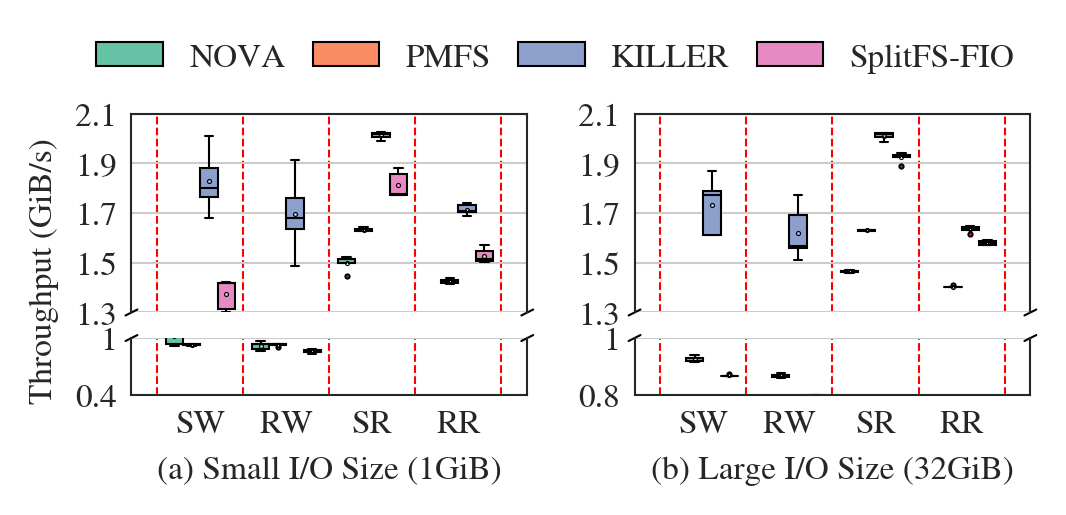

In [ ]:
# # ipython -c "%run plot.ipynb"

# import matplotlib
# import matplotlib.pyplot as plt
# from matplotlib import style
# import pandas as pd
# from matplotlib.gridspec import GridSpec
# from matplotlib.ticker import MultipleLocator
# from brokenaxes import brokenaxes

# # Paper specific settings
# STANDARD_WIDTH = 17.8
# SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
# DOUBLE_COL_WIDTH = STANDARD_WIDTH
# def cm_to_inch(value):
#     return value/2.54
    
# # matplotlib style settings
# matplotlib.rcParams['text.usetex'] = False
# style.use('seaborn-white')
# plt.rcParams["axes.grid"] = True
# plt.rcParams["axes.grid.axis"] = "y"
# plt.rcParams["grid.linewidth"] = 0.5
# plt.rcParams['hatch.linewidth'] = 0.5
# plt.rcParams["font.family"] = "Nimbus Roman"
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None


# # Data Preprocessing
# # with open("./avg-test-result-in-paper", "r") as f:
# with open("./performance-comparison-table-large-orig", "r") as f:
#     df_io_large = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
# with open("./performance-comparison-table-small-orig", "r") as f:
#     df_io_small = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

# df_io_large.drop(df_io_large[df_io_large['file_system'] == "PMM"].index, inplace=True)
# df_io_small.drop(df_io_small[df_io_small['file_system'] == "PMM"].index, inplace=True)

# # Plotting Settings
# fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4)))
# bar_width = 0.2
# subfig_titles = ["(a) Small I/O Size (1GiB)", "(b) Large I/O Size (32GiB)"]
# patterns = ['///', '\\\\\\', '', 'XXX', 'OOO', '---', '+++']
# # Reference: https://designbro.com/blog/inspiration/color-combinations/
# colors = ["#2b2d42", "#8d99ae", "#edf2f4", "#ef233c", "#ef233c", "#ef233c", "#ef233c", "#ef233c",]

# # dfs = [df_io_small, df_io_large]
# dfs = [df_io_small, df_io_large]
# boxplots = []
# gs0 = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[1, 1],  wspace=0.1)
# for df_idx, df in enumerate(dfs):
#     gs0_fid = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs0[df_idx], hspace=0.2, height_ratios=[7, 2])
#     ax_top = plt.subplot(gs0_fid[0])
#     ax_bottom = plt.subplot(gs0_fid[1])
#     # plt.subplot(1, 2, df_idx + 1)
#     # ax = fig.gca()
#     lw = 0.5
#     # for axis in ['top','bottom','left','right']:
#     #     ax.spines[axis].set_linewidth(lw)
#     # ax.xaxis.set_minor_locator(MultipleLocator(0.5))
#     # ax.grid(which='minor', linewidth='0.5')
#     # fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
#     fss = ["NOVA", "PMFS", "KILLER", "SplitFS-FIO"]
#     ops = ["seq-write", "rnd-write", "seq-read", "rnd-read"]
#     tot = len(fss) * bar_width
#     x = list(range(1, len(ops) + 1))
    
#     for idx, fs in enumerate(fss):
#         points = []
#         for pivot in x:
#             point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
#             points.append(point)
#         bws = []
#         for op in ops:
#             bws.append(df[(df['file_system'] == fs) & (df['ops'] == op)]['bandwidth(MiB/s)'])
#         # if fs == "PMM":
#         #     plt.axhline(1, color=colors[idx], linestyle='--', linewidth=1)
#         # else:
#         #     plt.bar(points, bws, width=bar_width, hatch=patterns[idx], edgecolor='black', color=plt.get_cmap('Set2')(idx), linewidth=0.5)
#         # Boxplot
#         bp = ax_top.boxplot(bws, positions=points, widths=bar_width, patch_artist=True, showmeans=True, boxprops=dict(facecolor=plt.get_cmap('Set2')(idx), color='black', linewidth=0.5), whiskerprops=dict(color='black', linewidth=0.5), capprops=dict(color='black', linewidth=0.5), medianprops=dict(color='black', linewidth=0.5), meanprops=dict(marker='.', markeredgecolor='black', markerfacecolor='white', markersize=0.5, linewidth=0.5), flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 0.5})
        
#         bp = ax_bottom.boxplot(bws, positions=points, widths=bar_width, patch_artist=True, showmeans=True, boxprops=dict(facecolor=plt.get_cmap('Set2')(idx), color='black', linewidth=0.5), whiskerprops=dict(color='black', linewidth=0.5), capprops=dict(color='black', linewidth=0.5), medianprops=dict(color='black', linewidth=0.5), meanprops=dict(marker='.', markeredgecolor='black', markerfacecolor='white', markersize=0.5, linewidth=0.5), flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 0.5})
        
#         boxplots.append(bp)

#     for axis in ['top','bottom','left','right']:
#         ax_top.spines[axis].set_linewidth(lw)
#         ax_bottom.spines[axis].set_linewidth(lw)
    
#     ax_top.xaxis.set_minor_locator(MultipleLocator(0.5))
#     ax_bottom.xaxis.set_minor_locator(MultipleLocator(0.5))
#     ax_top.grid(which='minor', linewidth='0.5', color = 'red', zorder=999, linestyle="--")
#     ax_bottom.grid(which='minor', linewidth='0.5', color = 'red', zorder=999, linestyle="--")
    
#     ax_top.set_ylim(1300, 2100)
#     ax_top.set_yticks([1300, 1500, 1700, 1900, 2100])
#     ax_top.set_yticklabels([1.3, 1.5, 1.7, 1.9, 2.1], fontsize=8)
#     if df_idx == 0:
#         ax_bottom.set_ylim(400, 1000)
#         ax_bottom.set_yticks([400, 1000])
#         ax_bottom.set_yticklabels([0.4, 1], fontsize=8)
#     else:
#         ax_bottom.set_ylim(400, 1000)
#         ax_bottom.set_yticks([400, 1000])
#         ax_bottom.set_yticklabels([0.4, 1], fontsize=8)
        
#     ax_top.spines['bottom'].set_visible(False)
#     ax_bottom.spines['top'].set_visible(False)
#     # Draw title
#     # bax.xticks(x, labels=["SW", "RW", "SR", "RR"], fontsize=8)
#     # bax.ylim(1400, 2100)
#     # bax.yticks([1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100], labels=[1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1], fontsize=8)
#     # bax.xlabel(subfig_titles[df_idx], fontsize=8) 
#     # if (df_idx == 0):
#     #     plt.ylabel('Throughput (GiB/s)', fontsize=8)
        
#     # ax_bottom.set_xlabel(["SW", "RW", "SR", "RR"], fontsize=8)
#     ax_bottom.set_xticks(x)
#     ax_bottom.set_xticklabels(["SW", "RW", "SR", "RR"], fontsize=8)
    
#     ax_top.set_xticks(x)
#     ax_top.set_xticklabels([])

#     # 斜度还要看两拼接子图大小是几比几
#     d = .015 
#     kwargs = dict(transform=ax_top.transAxes, color='k', clip_on=False, linewidth=0.5)
#     ax_top.plot((-d, +d), (-d, +d), **kwargs)        
#     ax_top.plot((1 - d, 1 + d), (-d, + d), **kwargs)  
    
#     kwargs.update(transform=ax_bottom.transAxes)
#     ax_bottom.plot((-d, +d), (1 - d * 7/2, 1 + d* 7/2), **kwargs)  
#     ax_bottom.plot((1 - d, 1 + d), (1 - d* 7/2, 1 + d* 7/2), **kwargs)  

#     ax_bottom.set_xlabel(subfig_titles[df_idx], fontsize=8)
    
# # fig.supylabel("Throughput (GiB/s)").set_position((0.03, 0.5))
# # legend_labels = ["PMM"]
# fig.text(0, 0.55, "Throughput (GiB/s)", va='center', rotation='vertical', fontsize=8)
# legend_labels = fss
# # legend_labels.extend(fss[:-1]) 
# gs0.tight_layout(fig)
# # fig.legend(, loc='center', bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize=8, frameon=False)
# bps = [ bp["boxes"][0] for bp in boxplots[:len(fss)] ]
# fig.legend(bps, legend_labels, loc='center', bbox_to_anchor=(0.5, 1), ncol=4, fontsize=8, frameon=False, columnspacing=0.8)
# # plt.tight_layout()
# plt.savefig("./FIG-IO-Analysis.pdf", bbox_inches='tight', pad_inches=0)
